In [2]:
import breeze_connect
from breeze_connect import BreezeConnect

In [3]:
# Generate session token for each day  
# Log into this site while the 'developer tools -> network' tab is open  (https://api.icicidirect.com/apiuser/login?api_key=06890j43os6a521A7b7241i934KQ9S56)
# Copy 'API_session' key for 'payload' section in 127.0.0.1  

fresh_token = 2060751

In [4]:
isec = BreezeConnect(api_key="06890j43os6a521A7b7241i934KQ9S56")
isec.generate_session(
    api_secret="$42367K2z98758S712349896J6i^64Mx",
    session_token=fresh_token)

## Historical data  

In [106]:
import datetime
period = 36
current_date = str(datetime.datetime.today())
previous_date = str(datetime.datetime.today() - datetime.timedelta(days=period))
current_date, previous_date

('2022-11-25 01:16:45.626069', '2022-10-20 01:16:45.626121')

`Daily data nifty`  

In [96]:
nifty_daily = isec.get_historical_data(
    interval="1day", 
    from_date=previous_date, 
    to_date=current_date,
    stock_code="NIFTY",
    exchange_code="NSE",
    product_type="",
    expiry_date="")

# nifty_daily

In [97]:
import pandas as pd
df = pd.DataFrame(nifty_daily['Success'])
print(len(df))
df.tail()

24


,datetime,stock_code,exchange_code,product_type,expiry_date,right,strike_price,open,high,low,close,volume,open_interest,count
19,2022-11-18 12:11:00,NIFTY,NSE,None,None,None,None,18382.95,18394.6,18209.8,18307.65,256012925,None,19
20,2022-11-21 12:11:00,NIFTY,NSE,None,None,None,None,18246.4,18262.3,18133.35,18159.95,277939499,None,20
21,2022-11-22 12:11:00,NIFTY,NSE,None,None,None,None,18179.15,18261.85,18137.7,18244.2,289964443,None,21
22,2022-11-23 12:11:00,NIFTY,NSE,None,None,None,None,18325.2,18325.4,18246,18267.25,281177143,None,22
23,2022-11-24 12:11:00,NIFTY,NSE,None,None,None,None,18326.1,18529.7,18294.25,18484.1,285159319,None,23


In [98]:
# df.to_csv('datasets/nifty_daily.csv')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   datetime       24 non-null     object
 1   stock_code     24 non-null     object
 2   exchange_code  24 non-null     object
 3   product_type   0 non-null      object
 4   expiry_date    0 non-null      object
 5   right          0 non-null      object
 6   strike_price   0 non-null      object
 7   open           24 non-null     object
 8   high           24 non-null     object
 9   low            24 non-null     object
 10  close          24 non-null     object
 11  volume         24 non-null     object
 12  open_interest  0 non-null      object
 13  count          24 non-null     int64 
dtypes: int64(1), object(13)
memory usage: 2.8+ KB


In [100]:
df.columns

Index(['datetime', 'stock_code', 'exchange_code', 'product_type',
       'expiry_date', 'right', 'strike_price', 'open', 'high', 'low', 'close',
       'volume', 'open_interest', 'count'],
      dtype='object')

In [101]:
df[['open', 'high', 'low', 'close',
       'volume']] = df[['open', 'high', 'low', 'close',
       'volume']].astype('float64')
df[['count']] = df[['count']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       24 non-null     object 
 1   stock_code     24 non-null     object 
 2   exchange_code  24 non-null     object 
 3   product_type   0 non-null      object 
 4   expiry_date    0 non-null      object 
 5   right          0 non-null      object 
 6   strike_price   0 non-null      object 
 7   open           24 non-null     float64
 8   high           24 non-null     float64
 9   low            24 non-null     float64
 10  close          24 non-null     float64
 11  volume         24 non-null     float64
 12  open_interest  0 non-null      object 
 13  count          24 non-null     int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 2.8+ KB


In [102]:
df['return'] = df['close'].pct_change()
df.tail()

,datetime,stock_code,exchange_code,product_type,expiry_date,right,strike_price,open,high,low,close,volume,open_interest,count,return
19,2022-11-18 12:11:00,NIFTY,NSE,None,None,None,None,18382.95,18394.60,18209.80,18307.65,256012925.0,None,19,-0.001976
20,2022-11-21 12:11:00,NIFTY,NSE,None,None,None,None,18246.40,18262.30,18133.35,18159.95,277939499.0,None,20,-0.008068
21,2022-11-22 12:11:00,NIFTY,NSE,None,None,None,None,18179.15,18261.85,18137.70,18244.20,289964443.0,None,21,0.004639
22,2022-11-23 12:11:00,NIFTY,NSE,None,None,None,None,18325.20,18325.40,18246.00,18267.25,281177143.0,None,22,0.001263
23,2022-11-24 12:11:00,NIFTY,NSE,None,None,None,None,18326.10,18529.70,18294.25,18484.10,285159319.0,None,23,0.011871


In [103]:
df['return'].describe()

count    23.000000
mean      0.002242
std       0.006437
min      -0.008068
25%      -0.002246
50%       0.001263
75%       0.004683
max       0.017833
Name: return, dtype: float64

In [104]:
df.shape

(24, 15)

<AxesSubplot:xlabel='return', ylabel='Count'>

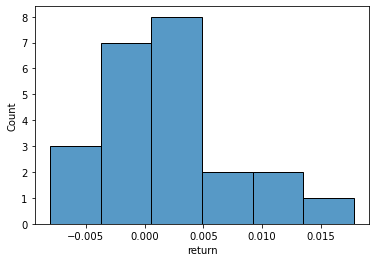

In [105]:
import seaborn as sns
sns.histplot(df['return'])

## Volatility comparison

In [112]:
period, current_date, previous_date

(36, '2022-11-25 01:16:45.626069', '2022-10-20 01:16:45.626121')

In [137]:
def predicted_range(spot, hv, sd_safety):
    movt = spot * hv/100 * sd_safety
    upper = spot + movt
    lower = spot - movt
    return spot, movt, lower, upper

predicted_range(17830, 0.65, 1.5)

(17830, 173.8425, 17656.1575, 18003.8425)

In [152]:
hv_wk = 10.4/(51**0.5)
print(hv_wk)
print(predicted_range(18484, hv_wk, 1))
print(predicted_range(18484, hv_wk, 1.5))

1.45629128738913
(18484, 269.1808815610068, 18214.819118438994, 18753.180881561006)
(18484, 403.7713223415102, 18080.22867765849, 18887.77132234151)
